# Lab 7 and 8 - HERA *The final showdown*
#### Aidan Berres
#### Physics 434
#### 12/13/20

In [2]:
from pyuvdata import UVData
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
uv = UVData()
uv.read('hera1.hd5',file_type='uvh5')
p=uv.get_antpairs()
freqs = uv.freq_array[0]*1e-6

In [4]:
bl1=p[506]
d1 = uv.get_data(bl1)
d1.shape

(20, 1536)

## Waterfall plots
Here I am using the Baseline (117,53) to show an example of a Waterfall plot

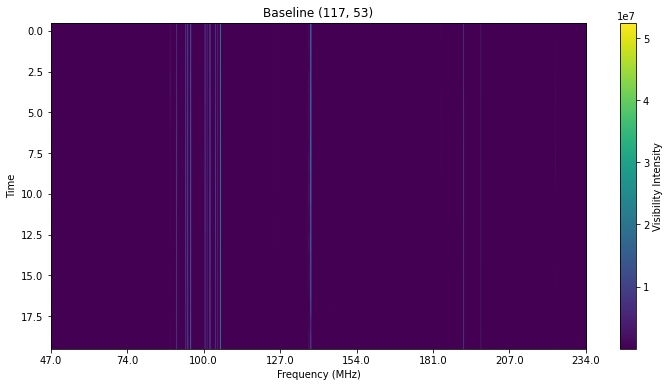

In [5]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(d1),aspect='auto')
cbar = fig.colorbar(im,label='Visibility Intensity')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Baseline {bl1}')
plt.show()

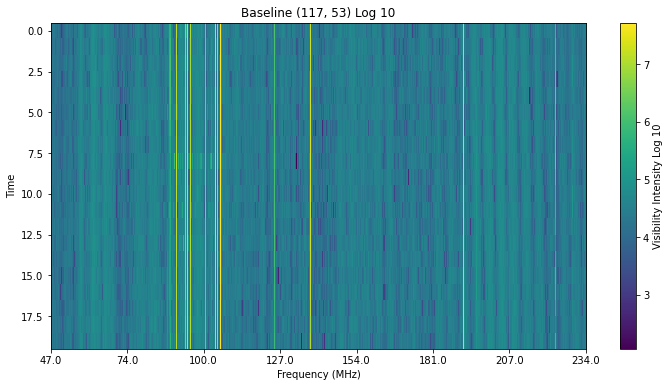

In [6]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(d1)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Baseline {bl1} Log 10')
plt.show()

We can see that these waterfall plots incorporate time and frequency with the intensity of visibilities corresponding to the colors of the plot.
## Signal removal
Here we define a function (`rm_bkg(bl)`) that I will not rename since I use it too much in this project. Which corresponds to the function $\Delta t = t_{ n+1 } - t_{ n }$ in which we will use for our first baseline sample (117, 53) and then with a subset of all the cross-correlations baselines in this dataset.

In [6]:
def rm_bkg(bl):
    sr1 = []
    for i in range(19):
        sr1.append(bl[i+1]-bl[i])
    sr1=np.array(sr1)
    return sr1

In [7]:
sr1=rm_bkg(d1)

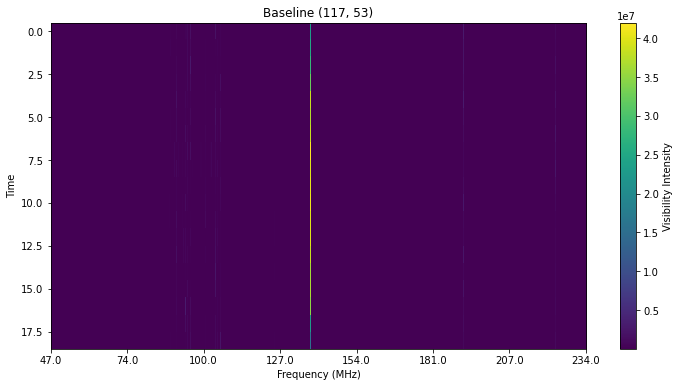

In [10]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(sr1),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Baseline {bl1}')
plt.show()

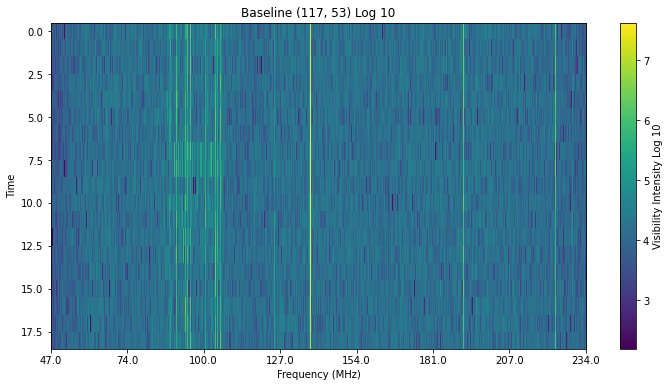

In [44]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(sr1)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Baseline {bl1} Log 10')
plt.show()

We can see here that most of the constant signals have all been removed. We can also see that a strong difference at around 135 MHz in which a large amount of difference has occured. We will explore this more in the "Feature Exploration" section of this report.

We can see here below how this signal removal process works and how the differences work. We see that we have slight differences in both the $t_{10}$ and $t_{9}$ plots and when we difference them we find that there less signals and that the background becomes more uniform.

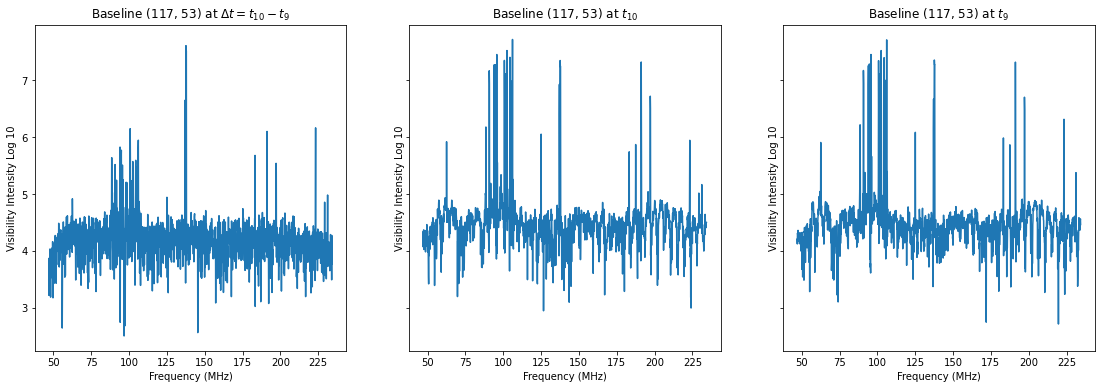

In [144]:
n=9
fig,ax=plt.subplots(1,3,figsize=(19,6),sharey=True)
ax[0].plot(freqs,np.log10(np.abs(sr1[n])))
ax[1].plot(freqs,np.log10(np.abs(d1[n+1])))
ax[2].plot(freqs,np.log10(np.abs(d1[n])))
ax[0].set_xlabel('Frequency (MHz)')
ax[0].set_ylabel('Visibility Intensity Log 10')
ax[1].set_xlabel('Frequency (MHz)')
ax[1].set_ylabel('Visibility Intensity Log 10')
ax[2].set_xlabel('Frequency (MHz)')
ax[2].set_ylabel('Visibility Intensity Log 10')
ax[0].set_title(fr"Baseline {bl1} at $\Delta t = t_{ {n+1} } - t_{ {n} }$",fontsize=12);
ax[1].set_title(fr"Baseline {bl1} at $t_{ {n+1} }$",fontsize=12);
ax[2].set_title(fr"Baseline {bl1} at $t_{ {n} } $",fontsize=12);

## Feature Exploration
Using the Radio Frequency Spectrum Allocation Chart for South Africa, found [here](https://www.ee.co.za/wp-content/uploads/2015/03/csir-035-02-2015_.jpg),
![Image](https://www.ee.co.za/wp-content/uploads/2015/03/csir-035-02-2015_.jpg)

We can see that these bright signals between 87.5 MHz and 108.0 MHz are most likely Broadcasting signals

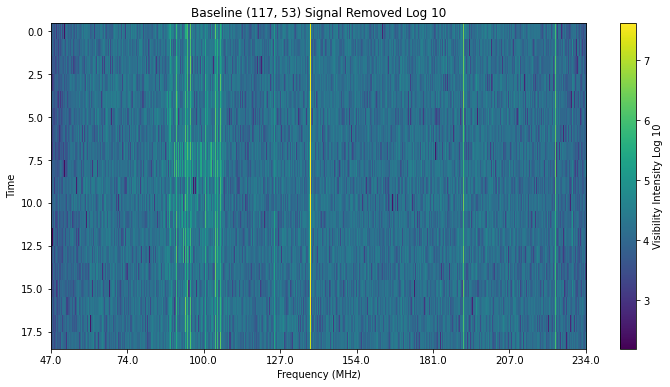

In [32]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(sr1)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Baseline {bl1} Signal Removed Log 10')
#plt.xlim(300,500)
plt.show()

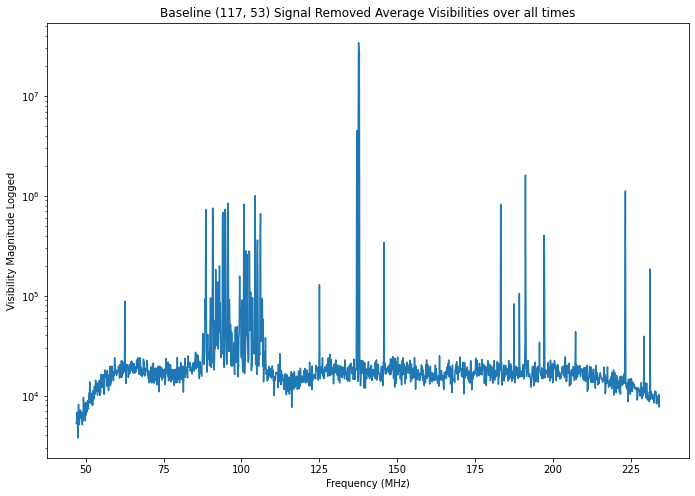

In [37]:
plt.subplots(figsize=(11.5,8))
dav1=np.mean(abs(sr1),axis=0)
plt.plot(freqs,dav1)
plt.yscale('log')
plt.title('Baseline (117, 53) Signal Removed Average Visibilities over all times')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Visibility Magnitude Logged');
#plt.hlines(2e4,freqs[0],freqs[-1],color='red')
#plt.xlim(100,180)

In [56]:
print('The maximum',freqs[dav1.argmax()])

137.6190185546875

Using the chart we see that 

404.0


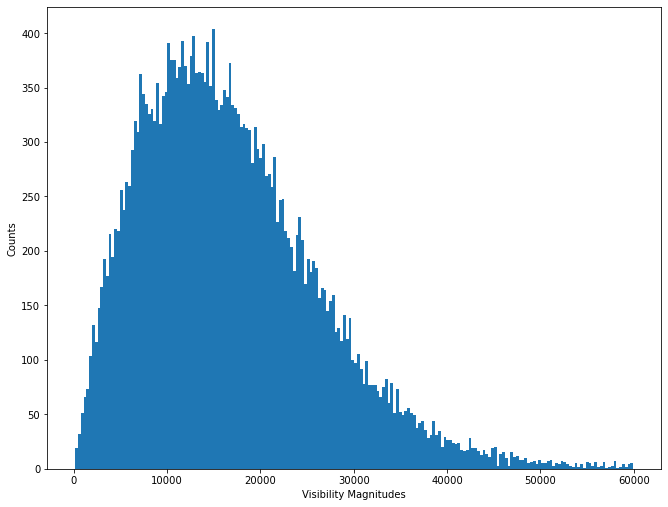

In [38]:
plt.subplots(figsize=(11,8.5))
sr1f=np.abs(sr1).flatten()
#vro1=sr1f[200:1400]
vro1 = sr1f[sr1f < 6e4]
#plt.yscale('log')
n=plt.hist(vro1,bins=200);
print(n[0].max())
plt.xlabel('Visibility Magnitudes')
plt.ylabel('Counts');

62.0


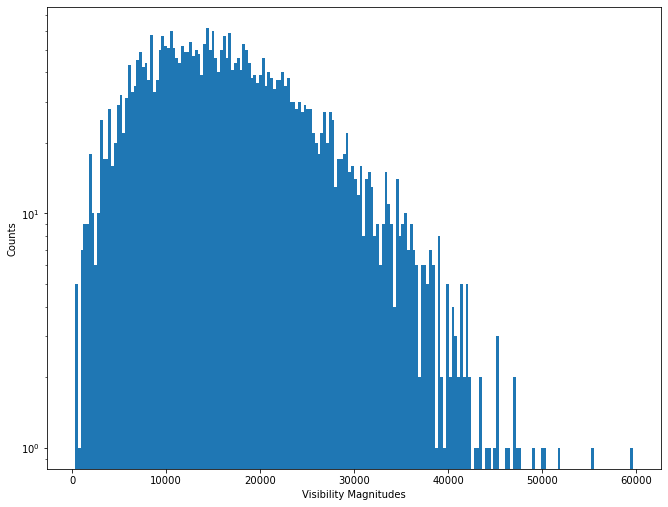

In [39]:
plt.subplots(figsize=(11,8.5))
sr1f=np.abs(sr1[:,900:1100]).flatten()
vro1=sr1f
vro1 = vro1[vro1 <6e4]
plt.yscale('log')
n=plt.hist(vro1,bins=200);
print(n[0].max())
plt.xlabel('Visibility Magnitudes')
plt.ylabel('Counts');

In [122]:
sr1[::].shape

(19, 1536)

## Average visibility plots

I am using a random sample of 100 cross-correlation baselines from the original list of **630** cross-correlation baslines

In [74]:
ns=[]
for i in range(len(p)):
    if p[i][0]!=p[i][1]:
        ns.append(p[i])

In [76]:
len(ns)

630

In [25]:
np.random.seed(420)
ns=[]
for i in range(len(p)):
    if p[i][0]!=p[i][1]:
        ns.append(p[i])
rni= np.random.choice(np.arange(len(ns),dtype=int),size=100,replace=False)
npa=np.array(ns)
rns=npa[rni]

In [41]:
avg1=[]
for i in range(20):
    ma= []
    for j in range(len(rns)):
        sha = abs(uv.get_data(rns[j]))
        ma.append(sha[i])
    ma = np.array(ma)
    mc=ma.mean(axis=0)
    avg1.append(mc)
avg1=np.array(avg1)
avg1.shape

(20, 1536)

In [42]:
avg1sr=[]
for i in range(19):
    bt = []
    for j in range(len(rns)):
        d = abs(rm_bkg(uv.get_data(rns[j])))
        bt.append(d[i])
    bt = np.array(bt)
    mc=bt.mean(axis=0)
    avg1sr.append(mc)
avg1sr=np.array(avg1sr)
avg1sr.shape

(19, 1536)

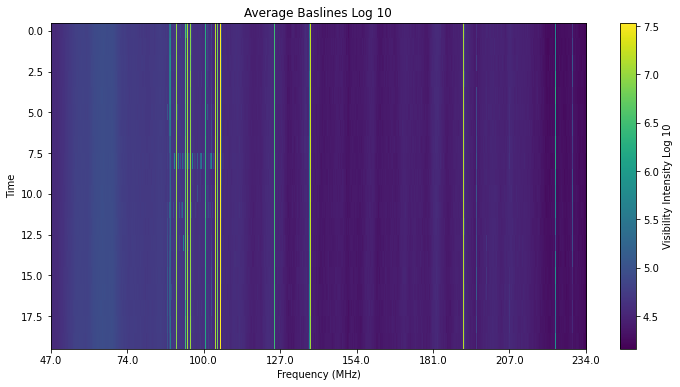

In [168]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(avg1)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Average Baslines Log 10')
plt.show()

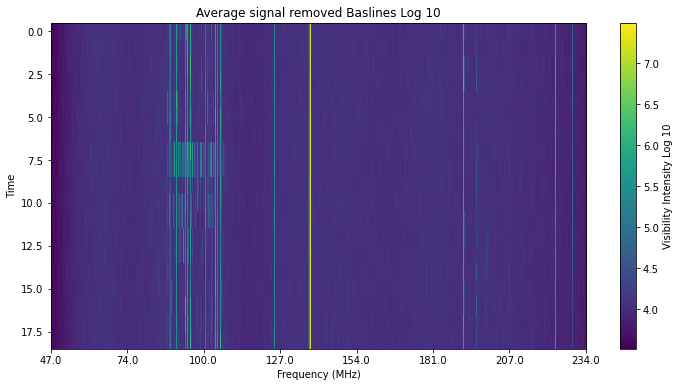

In [170]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(avg1sr)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Average signal removed Baslines Log 10')
plt.show()

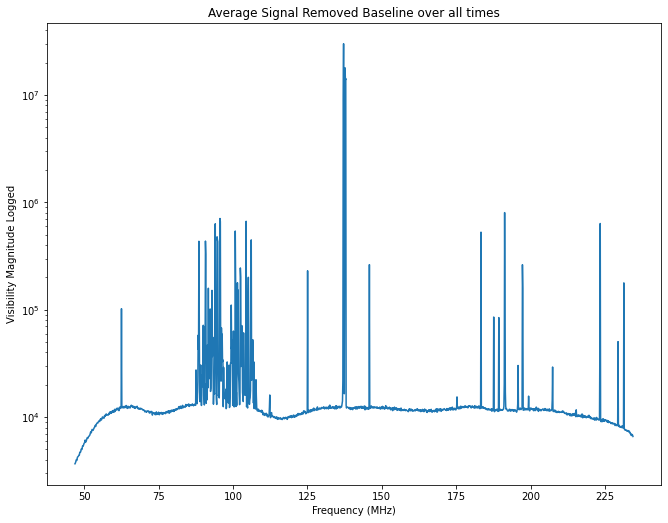

In [43]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.plot(freqs,np.abs(np.mean(avg1sr,axis=0)));
plt.title('Average Signal Removed Baseline over all times')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Visibility Magnitude Logged');

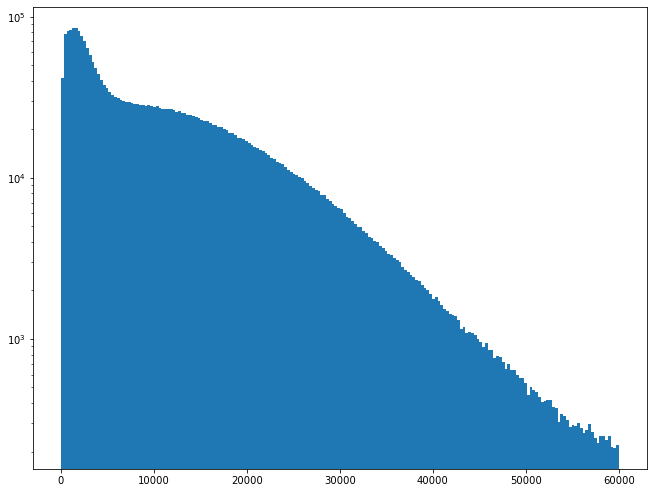

In [27]:
bt=[]
for j in range(len(rns)):
        d = rm_bkg(uv.get_data(rns[j]))
        bt.append(d)
plt.subplots(figsize=(11,8.5))
bt1=np.array(bt)
bt1f=np.abs(bt1).flatten()

vro2 = bt1f[bt1f < 6e4]
plt.yscale('log')
#plt.hist(bt1f,bins=200);
plt.hist(vro2,bins=200);

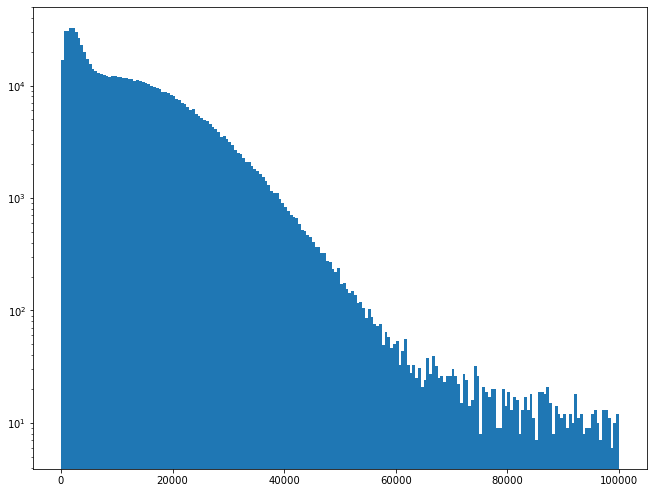

In [161]:
bt=[]
for j in range(len(rns)):
        d = rm_bkg(uv.get_data(rns[j]))
        bt.append(d) 
plt.subplots(figsize=(11,8.5))
bt1=np.array(bt)
bt1f=np.abs(bt1[:,:,800:1200]).flatten()
vro3=bt1f
vro3 = vro3[vro3 < 1e5]
plt.yscale('log')
#plt.hist(bt1f,bins=200);
plt.hist(vro3,bins=200);

## Jackknife plots

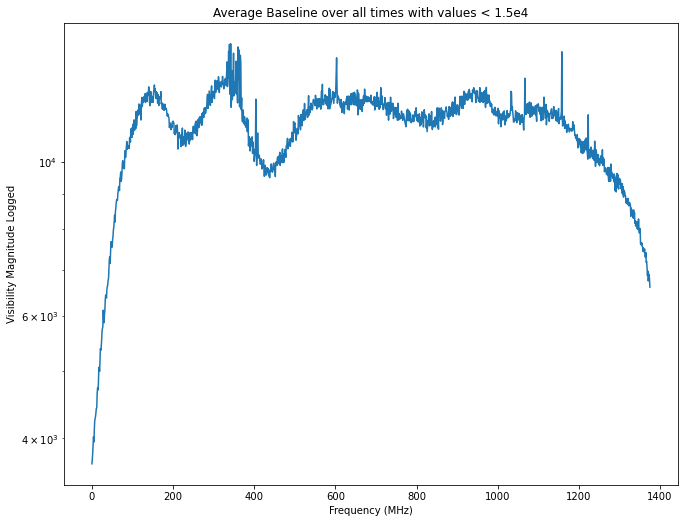

In [329]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
hi=np.abs(np.mean(avg1sr,axis=0))
maria1=hi[hi <1.5e4]
plt.plot(np.arange(len(maria1)),maria1);
plt.title('Average Baseline over all times with values < 1.5e4')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Visibility Magnitude Logged');

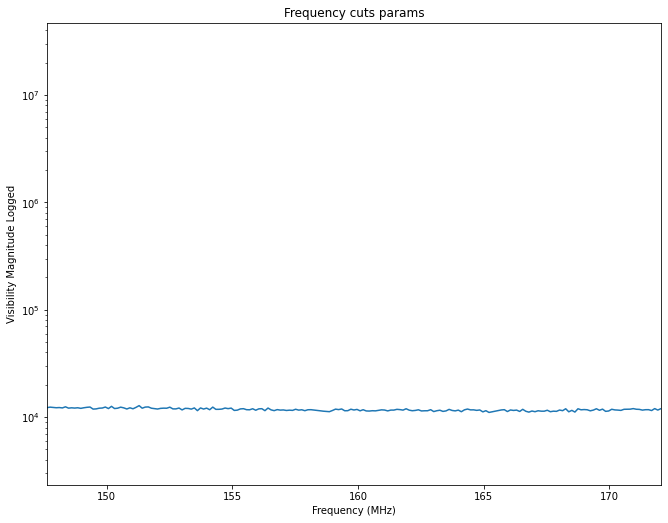

In [331]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.plot(freqs,np.abs(np.mean(avg1sr,axis=0)));
plt.xlim(freqs[825],freqs[825+200])
plt.xlabel('Frequency (MHz)')
plt.ylabel('Visibility Magnitude Logged');
plt.title('Frequency cuts params');

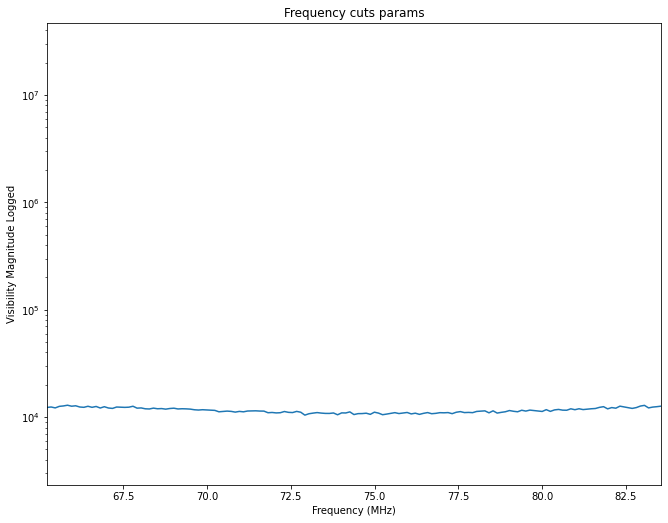

In [332]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.plot(freqs,np.abs(np.mean(avg1sr,axis=0)));
plt.xlim(freqs[150],freqs[300])
plt.xlabel('Frequency (MHz)')
plt.ylabel('Visibility Magnitude Logged');
plt.title('Frequency cuts params');

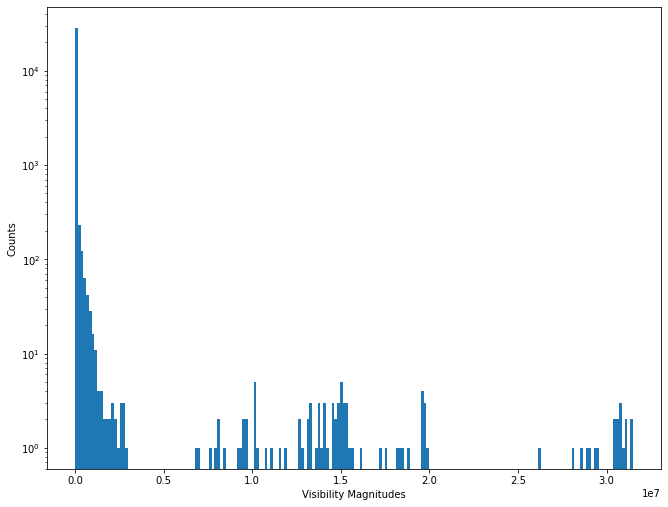

In [316]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
n,bins,p=plt.hist(avg1sr.flatten(),bins=200);
#b=bins[:-1]-bins[:1]
#plt.errorbar(b,n,yerr=5,elinewidth=1,linewidth=0)
plt.xlabel('Visibility Magnitudes')
plt.ylabel('Counts');

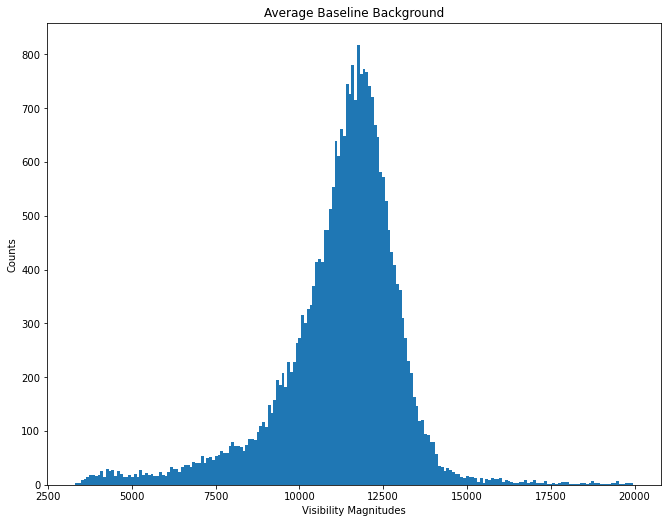

In [326]:
plt.subplots(figsize=(11,8.5))
fl = np.abs(avg1sr.flatten())
vro3 = fl[fl < 2e4]
#plt.yscale('log')
#plt.hist(bt1f,bins=200);
plt.hist(vro3,bins=200)
plt.title('Average Baseline Background')
plt.xlabel('Visibility Magnitudes')
plt.ylabel('Counts');

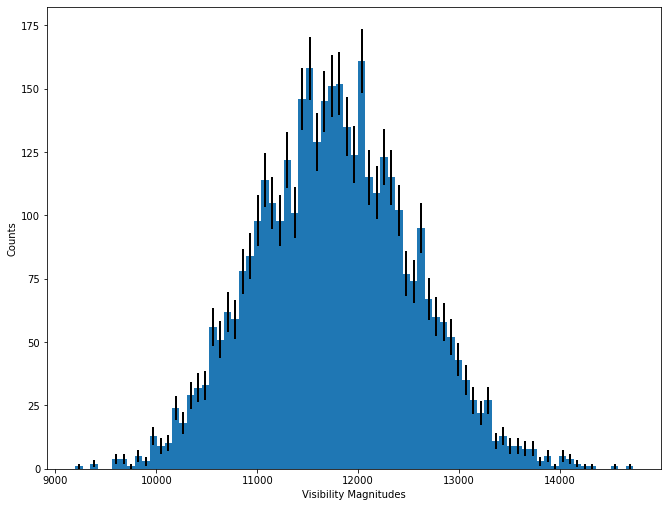

In [318]:
fig,ax=plt.subplots(figsize=(11,8.5))
fl = np.abs((avg1sr[:,825:1025].flatten()))
vro3 = fl#[fl < 8e4]
#plt.yscale('log')
#plt.hist(bt1f,bins=200);
n1,bins,p=plt.hist(vro3,bins=75);
b=bins[:-1]+(bins[1+20]-bins[0+20])/2
plt.errorbar(b,n1,yerr=np.sqrt(n1),elinewidth=2,linewidth=0,color='k');
plt.xlabel('Visibility Magnitudes')
plt.ylabel('Counts');
plt.xlabel('Visibility Magnitudes')
plt.ylabel('Counts');

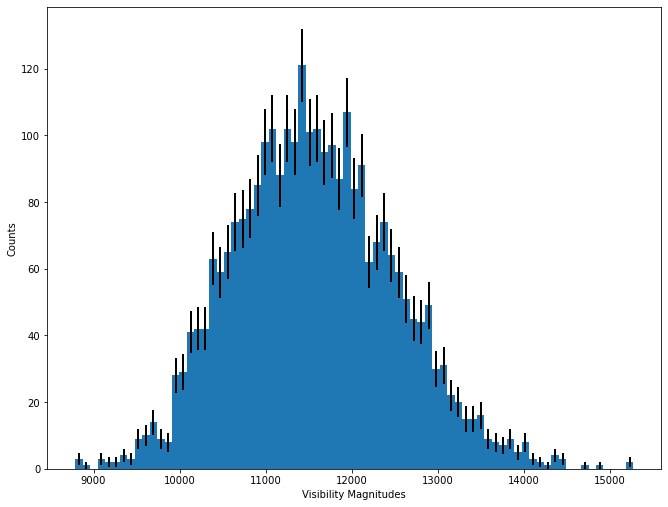

In [319]:
plt.subplots(figsize=(11,8.5))
fl = np.abs(avg1sr[:,150:300].flatten())
vro3 = fl#[fl < n1[1].max()]
#plt.yscale('log')
#plt.hist(bt1f,bins=200);
n2,bins,p=plt.hist(vro3,bins=75);
b=bins[:-1]+(bins[1+20]-bins[0+20])/2
plt.errorbar(b,n2,yerr=np.sqrt(n2),elinewidth=2,linewidth=0,color='k');
plt.xlabel('Visibility Magnitudes')
plt.ylabel('Counts');

<BarContainer object of 75 artists>

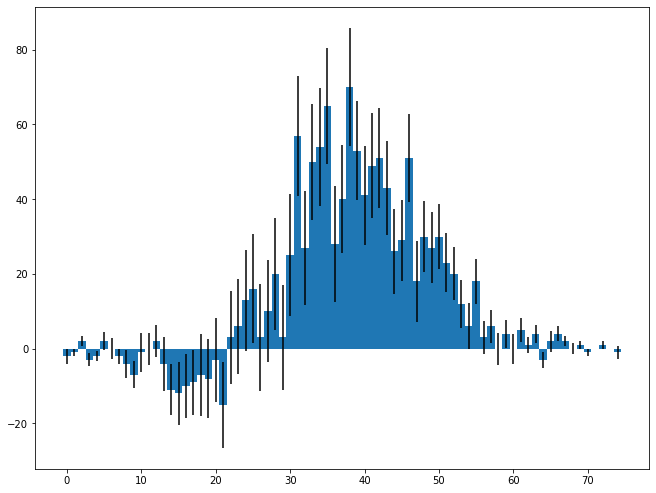

In [295]:
plt.subplots(figsize=(11,8.5))
diff=n1-n2
plt.bar(np.arange(len(diff)),diff,width=1,yerr=np.sqrt(n1+n2))

## Data Cuts

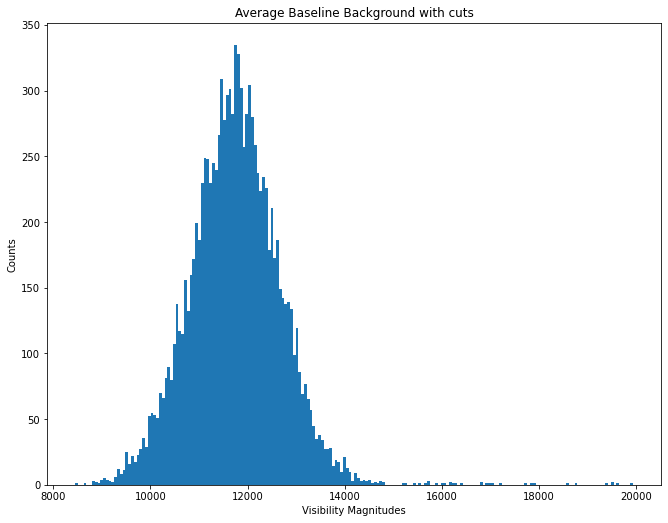

In [327]:
fig,ax=plt.subplots(figsize=(11,8.5))
fl = np.abs((avg1sr[:,800:1400].flatten()))
vro3 = fl[fl < 2e4]
#plt.yscale('log')
#plt.hist(bt1f,bins=200);
n1,bins,p=plt.hist(vro3,bins=200);
plt.title('Average Baseline Background with cuts')
plt.xlabel('Visibility Magnitudes')
plt.ylabel('Counts');

Write something